# Classification

**hypothyroid**

## Verisetiye Genel Bakış

In [165]:
import pandas as pd
import numpy as np
df=pd.read_csv("dataset_57_hypothyroid.csv")
print("=======Verisetinin üst kısmı=======")
df.head()

=======Verisetinin üst kısmı=======


age sex on_thyroxine query_on_thyroxine on_antithyroid_medication sick  \
0  41   F            f                  f                         f    f   
1  23   F            f                  f                         f    f   
2  46   M            f                  f                         f    f   
3  70   F            t                  f                         f    f   
4  70   F            f                  f                         f    f   

  pregnant thyroid_surgery I131_treatment query_hypothyroid  ... TT4_measured  \
0        f               f              f                 f  ...            t   
1        f               f              f                 f  ...            t   
2        f               f              f                 f  ...            t   
3        f               f              f                 f  ...            t   
4        f               f              f                 f  ...            t   

   TT4 T4U_measured   T4U FTI_measured  FTI TBG_measured TBG referral_source  \
0  125            t  1.14            t  109            f   ?            SVHC   
1  102            f     ?            f    ?            f   ?           other   
2  109            t  0.91            t  120            f   ?           other   
3  175            f     ?            f    ?            f   ?           other   
4   61            t  0.87            t   70            f   ?             SVI   

      Class  
0  negative  
1  negative  
2  negative  
3  negative  
4  negative  

[5 rows x 30 columns]

In [166]:
print("=======Verisetinin Alt kısmı=======")
df.tail()

=======Verisetinin Alt kısmı=======


age sex on_thyroxine query_on_thyroxine on_antithyroid_medication sick  \
3767  30   F            f                  f                         f    f   
3768  68   F            f                  f                         f    f   
3769  74   F            f                  f                         f    f   
3770  72   M            f                  f                         f    f   
3771  64   F            f                  f                         f    f   

     pregnant thyroid_surgery I131_treatment query_hypothyroid  ...  \
3767        f               f              f                 f  ...   
3768        f               f              f                 f  ...   
3769        f               f              f                 f  ...   
3770        f               f              f                 f  ...   
3771        f               f              f                 f  ...   

     TT4_measured  TT4 T4U_measured   T4U FTI_measured  FTI TBG_measured TBG  \
3767            f    ?            f     ?            f    ?            f   ?   
3768            t  124            t  1.08            t  114            f   ?   
3769            t  112            t  1.07            t  105            f   ?   
3770            t   82            t  0.94            t   87            f   ?   
3771            t   99            t  1.07            t   92            f   ?   

     referral_source     Class  
3767           other  negative  
3768             SVI  negative  
3769           other  negative  
3770             SVI  negative  
3771           other  negative  

[5 rows x 30 columns]

In [19]:
print("=======Verisetinin Sutün Bilgileri=======")
print(df.info())

=======Verisetinin Sutün Bilgileri=======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
age                          3772 non-null object
sex                          3772 non-null object
on_thyroxine                 3772 non-null object
query_on_thyroxine           3772 non-null object
on_antithyroid_medication    3772 non-null object
sick                         3772 non-null object
pregnant                     3772 non-null object
thyroid_surgery              3772 non-null object
I131_treatment               3772 non-null object
query_hypothyroid            3772 non-null object
query_hyperthyroid           3772 non-null object
lithium                      3772 non-null object
goitre                       3772 non-null object
tumor                        3772 non-null object
hypopituitary                3772 non-null object
psych                        3772 non-null object
TSH_measured                 3772 non-null object
T

In [167]:
print("=======Sutünlerin istatistikleri=======")
print(df.describe())

=======Sutünlerin istatistikleri=======
         age   sex on_thyroxine query_on_thyroxine on_antithyroid_medication  \
count   3772  3772         3772               3772                      3772   
unique    94     3            2                  2                         2   
top       59     F            f                  f                         f   
freq      95  2480         3308               3722                      3729   

        sick pregnant thyroid_surgery I131_treatment query_hypothyroid  ...  \
count   3772     3772            3772           3772              3772  ...   
unique     2        2               2              2                 2  ...   
top        f        f               f              f                 f  ...   
freq    3625     3719            3719           3713              3538  ...   

       TT4_measured   TT4 T4U_measured   T4U FTI_measured   FTI TBG_measured  \
count          3772  3772         3772  3772         3772  3772         3772   
uni

## Özellik Seçimi
* class sutününde 4 kategori bulunmaktadır. bu kategoriler 0-1 ile değiştirilecek. diğer sutünler ise tipleri değiştirilmeli. TBG_measured ve TBG sutünleri silinmeli çünkü birbiriyle bağlıdır ve tüm satırlarda aynı değerlere sahiptirler.

In [168]:
df.drop(["TBG_measured","TBG"],axis=1,inplace=True)

## Veri Temizliği ve Dönüşümü

### Kayıp verilerin (missing data) tespiti ve dönüşümü

In [169]:
df.head()

age sex on_thyroxine query_on_thyroxine on_antithyroid_medication sick  \
0  41   F            f                  f                         f    f   
1  23   F            f                  f                         f    f   
2  46   M            f                  f                         f    f   
3  70   F            t                  f                         f    f   
4  70   F            f                  f                         f    f   

  pregnant thyroid_surgery I131_treatment query_hypothyroid  ... T3_measured  \
0        f               f              f                 f  ...           t   
1        f               f              f                 f  ...           t   
2        f               f              f                 f  ...           f   
3        f               f              f                 f  ...           t   
4        f               f              f                 f  ...           t   

    T3 TT4_measured  TT4 T4U_measured   T4U FTI_measured  FTI referral_source  \
0  2.5            t  125            t  1.14            t  109            SVHC   
1    2            t  102            f     ?            f    ?           other   
2    ?            t  109            t  0.91            t  120           other   
3  1.9            t  175            f     ?            f    ?           other   
4  1.2            t   61            t  0.87            t   70             SVI   

      Class  
0  negative  
1  negative  
2  negative  
3  negative  
4  negative  

[5 rows x 28 columns]

In [170]:
missing_val=["?"]
df=pd.read_csv("dataset_57_hypothyroid.csv",sep=",",na_values=missing_val)
df.drop(["TBG_measured","TBG"],axis=1,inplace=True)
df.head()

age sex on_thyroxine query_on_thyroxine on_antithyroid_medication sick  \
0  41.0   F            f                  f                         f    f   
1  23.0   F            f                  f                         f    f   
2  46.0   M            f                  f                         f    f   
3  70.0   F            t                  f                         f    f   
4  70.0   F            f                  f                         f    f   

  pregnant thyroid_surgery I131_treatment query_hypothyroid  ... T3_measured  \
0        f               f              f                 f  ...           t   
1        f               f              f                 f  ...           t   
2        f               f              f                 f  ...           f   
3        f               f              f                 f  ...           t   
4        f               f              f                 f  ...           t   

    T3 TT4_measured    TT4 T4U_measured   T4U FTI_measured    FTI  \
0  2.5            t  125.0            t  1.14            t  109.0   
1  2.0            t  102.0            f   NaN            f    NaN   
2  NaN            t  109.0            t  0.91            t  120.0   
3  1.9            t  175.0            f   NaN            f    NaN   
4  1.2            t   61.0            t  0.87            t   70.0   

  referral_source     Class  
0            SVHC  negative  
1           other  negative  
2           other  negative  
3           other  negative  
4             SVI  negative  

[5 rows x 28 columns]

In [27]:
print(df.isnull().sum())

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                          369
T3_measured                    0
T3                           769
TT4_measured                   0
TT4                          231
T4U_measured                   0
T4U                          387
FTI_measured                   0
FTI                          385
referral_source                0
Class                          0
dtype: int64


In [171]:
print("Toplam Boşluk sayısı: ",df.isnull().sum().sum())

Toplam Boşluk sayısı:  2292


**age sutündeki boşluğu ortalama ile doldurulmalı.**

In [172]:
df["age"].fillna((df["age"].mean()),inplace=True)

In [173]:
df["age"].isnull().sum()

0

**sex sutündeki boşluklar silinmeli.**

In [174]:
df["sex"].dropna(axis=0,inplace=True)

In [175]:
df["sex"].isnull().sum()

0

**TSH, T3, TT4, T4U, ve FTI  sutünlerinde boşluk değerlere 0 verilmelidir. 0 çünkü bu testler yapılmamıştır.**

In [176]:
sutunler=["TSH", "T3", "TT4", "T4U","FTI"]
for sutun in sutunler:
    df[sutun].fillna(0,inplace=True)

**TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured  sutünleri kaldırılması gerekir çünkü önceki adımla bu testleri yapmayanları 0 ile belirlenmiştir.**

In [177]:
sutunler=["TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured"]
for sutun in sutunler:
    df.drop([sutun],axis=1,inplace=True)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 23 columns):
age                          3772 non-null float64
sex                          3622 non-null object
on_thyroxine                 3772 non-null object
query_on_thyroxine           3772 non-null object
on_antithyroid_medication    3772 non-null object
sick                         3772 non-null object
pregnant                     3772 non-null object
thyroid_surgery              3772 non-null object
I131_treatment               3772 non-null object
query_hypothyroid            3772 non-null object
query_hyperthyroid           3772 non-null object
lithium                      3772 non-null object
goitre                       3772 non-null object
tumor                        3772 non-null object
hypopituitary                3772 non-null object
psych                        3772 non-null object
TSH                          3772 non-null float64
T3                           3772 non-nul

In [179]:
df.reset_index(inplace=True,drop=True)
print(df)
df.info()

       age sex on_thyroxine query_on_thyroxine on_antithyroid_medication sick  \
0     41.0   F            f                  f                         f    f   
1     23.0   F            f                  f                         f    f   
2     46.0   M            f                  f                         f    f   
3     70.0   F            t                  f                         f    f   
4     70.0   F            f                  f                         f    f   
...    ...  ..          ...                ...                       ...  ...   
3767  30.0   F            f                  f                         f    f   
3768  68.0   F            f                  f                         f    f   
3769  74.0   F            f                  f                         f    f   
3770  72.0   M            f                  f                         f    f   
3771  64.0   F            f                  f                         f    f   

     pregnant thyroid_surge

### Tekrarlayan verilerin kaldırılması

In [180]:
print(df.duplicated().sum())

61


In [96]:
print(df[df.duplicated()])

       age sex on_thyroxine query_on_thyroxine on_antithyroid_medication sick  \
204   26.0   F            f                  f                         f    f   
210   64.0   F            f                  f                         f    f   
303   22.0   F            f                  f                         f    f   
431   58.0   F            f                  f                         f    f   
717   40.0   F            f                  f                         f    f   
...    ...  ..          ...                ...                       ...  ...   
3538  29.0   M            f                  f                         f    f   
3638  38.0   F            f                  f                         f    f   
3707  51.0   F            f                  f                         f    f   
3752  71.0   F            f                  f                         f    f   
3763  41.0   F            f                  f                         f    f   

     pregnant thyroid_surge

In [181]:
df.drop_duplicates(inplace=True)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3711 entries, 0 to 3771
Data columns (total 23 columns):
age                          3711 non-null float64
sex                          3562 non-null object
on_thyroxine                 3711 non-null object
query_on_thyroxine           3711 non-null object
on_antithyroid_medication    3711 non-null object
sick                         3711 non-null object
pregnant                     3711 non-null object
thyroid_surgery              3711 non-null object
I131_treatment               3711 non-null object
query_hypothyroid            3711 non-null object
query_hyperthyroid           3711 non-null object
lithium                      3711 non-null object
goitre                       3711 non-null object
tumor                        3711 non-null object
hypopituitary                3711 non-null object
psych                        3711 non-null object
TSH                          3711 non-null float64
T3                           3711 non-nul

In [183]:
df.reset_index(inplace=True,drop=True)
print(df)
df.info()

       age sex on_thyroxine query_on_thyroxine on_antithyroid_medication sick  \
0     41.0   F            f                  f                         f    f   
1     23.0   F            f                  f                         f    f   
2     46.0   M            f                  f                         f    f   
3     70.0   F            t                  f                         f    f   
4     70.0   F            f                  f                         f    f   
...    ...  ..          ...                ...                       ...  ...   
3706  30.0   F            f                  f                         f    f   
3707  68.0   F            f                  f                         f    f   
3708  74.0   F            f                  f                         f    f   
3709  72.0   M            f                  f                         f    f   
3710  64.0   F            f                  f                         f    f   

     pregnant thyroid_surge

### Kategorik verilerin dönüşümü

In [184]:
sutunler=df.columns.to_list()
sutunler2=sutunler[1:16]
sutunler2.append(sutunler[21])
print(sutunler2)
df["sex"].dropna(inplace=True)

['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'referral_source']


In [185]:
for sutun in sutunler2:
    print(df[sutun].unique())
    df=pd.get_dummies(df,columns=[sutun])

['F' 'M']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['SVHC' 'other' 'SVI' 'STMW' 'SVHD']


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3711 entries, 0 to 3710
Data columns (total 42 columns):
age                            3711 non-null float64
TSH                            3711 non-null float64
T3                             3711 non-null float64
TT4                            3711 non-null float64
T4U                            3711 non-null float64
FTI                            3711 non-null float64
Class                          3711 non-null object
sex_F                          3711 non-null uint8
sex_M                          3711 non-null uint8
on_thyroxine_f                 3711 non-null uint8
on_thyroxine_t                 3711 non-null uint8
query_on_thyroxine_f           3711 non-null uint8
query_on_thyroxine_t           3711 non-null uint8
on_antithyroid_medication_f    3711 non-null uint8
on_antithyroid_medication_t    3711 non-null uint8
sick_f                         3711 non-null uint8
sick_t                         3711 non-null uint8
pregnant_f   

In [187]:
df["Class"].unique()

array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

In [188]:
df.Class=[0 if i =="negative" else 1 for i in df.Class]
print(df.head())

    age   TSH   T3    TT4   T4U    FTI  Class  sex_F  sex_M  on_thyroxine_f  \
0  41.0  1.30  2.5  125.0  1.14  109.0      0      1      0               1   
1  23.0  4.10  2.0  102.0  0.00    0.0      0      1      0               1   
2  46.0  0.98  0.0  109.0  0.91  120.0      0      0      1               1   
3  70.0  0.16  1.9  175.0  0.00    0.0      0      1      0               0   
4  70.0  0.72  1.2   61.0  0.87   70.0      0      1      0               1   

   ...  tumor_t  hypopituitary_f  hypopituitary_t  psych_f  psych_t  \
0  ...        0                1                0        1        0   
1  ...        0                1                0        1        0   
2  ...        0                1                0        1        0   
3  ...        0                1                0        1        0   
4  ...        0                1                0        1        0   

   referral_source_STMW  referral_source_SVHC  referral_source_SVHD  \
0                     0    

### Veri tiplerinin dönüşümü

In [189]:
print(df.dtypes)

age                            float64
TSH                            float64
T3                             float64
TT4                            float64
T4U                            float64
FTI                            float64
Class                            int64
sex_F                            uint8
sex_M                            uint8
on_thyroxine_f                   uint8
on_thyroxine_t                   uint8
query_on_thyroxine_f             uint8
query_on_thyroxine_t             uint8
on_antithyroid_medication_f      uint8
on_antithyroid_medication_t      uint8
sick_f                           uint8
sick_t                           uint8
pregnant_f                       uint8
pregnant_t                       uint8
thyroid_surgery_f                uint8
thyroid_surgery_t                uint8
I131_treatment_f                 uint8
I131_treatment_t                 uint8
query_hypothyroid_f              uint8
query_hypothyroid_t              uint8
query_hyperthyroid_f     

* age sutündeki değerler int tipinden olması gerekir.

In [190]:
donusum={'age':int}
df=df.astype(donusum)
print(df.dtypes)

age                              int32
TSH                            float64
T3                             float64
TT4                            float64
T4U                            float64
FTI                            float64
Class                            int64
sex_F                            uint8
sex_M                            uint8
on_thyroxine_f                   uint8
on_thyroxine_t                   uint8
query_on_thyroxine_f             uint8
query_on_thyroxine_t             uint8
on_antithyroid_medication_f      uint8
on_antithyroid_medication_t      uint8
sick_f                           uint8
sick_t                           uint8
pregnant_f                       uint8
pregnant_t                       uint8
thyroid_surgery_f                uint8
thyroid_surgery_t                uint8
I131_treatment_f                 uint8
I131_treatment_t                 uint8
query_hypothyroid_f              uint8
query_hypothyroid_t              uint8
query_hyperthyroid_f     

### Aşırı verilerin kontrolü

In [191]:
from scipy import stats
x=df.columns.tolist()
y=x[0:6]
U=np.arange(3712,3841,1) #bu dizide aşırı verilerin bulunduğu indeksleri saklamak için oluşturulmuştur ve herhangi bir indeksi kaybetmemek için sınırları verinin sayısından büyük başlangıç sınırı seçilmiştir. son sınırı ise toplam kaç tane aşırı veri hesaplanıp belirlenmiştir
say=0
say2=0 #kaç tane Aşırı veri hesaplamak için kullanılmıştır
for s in y:
    z=np.abs(stats.zscore(df[s]))
    print(s)
    c=np.where(z>3)
    print(c[0])
    say2+=len(c[0])
    for l in c[0]:
        if (l in U)==True:
            pass
        else:
            U[say]=l
            say+=1
            
        
print(U[0:say])# tekrarlanmayanı almak için
    
print(say2)

age
[1352]
TSH
[  88  116  222  257  280  635  655  663  936 1153 1277 1363 1601 1632
 1805 1971 2032 2188 2199 2394 2471 2540 2557 2652 2661 2713 2728 2886
 2965 2988 3007 3323 3373 3381 3395 3479 3581 3596 3681]
T3
[  25  151  247  437  452  538  595  600  738  778  957 1176 1566 1654
 1722 1737 1749 1822 1832 2485 2576 2620 2969 3093 3206 3310 3359 3498
 3530 3664]
TT4
[  69  335  452  538  600  619  647  718  738  778 1203 1205 1403 1749
 1832 1915 1939 2334 2370 2527 2580 2632 2725 2775 2844 2944 2969 3044
 3206 3498 3696]
T4U
[ 298  526  735 1904 1939 2775 3632]
FTI
[ 151  452  538  600  647  738  958 1403 1654 1749 1756 1832 1915 2028
 2764 2944 2969 3206 3285 3498]
[1352   88  116  222  257  280  635  655  663  936 1153 1277 1363 1601
 1632 1805 1971 2032 2188 2199 2394 2471 2540 2557 2652 2661 2713 2728
 2886 2965 2988 3007 3323 3373 3381 3395 3479 3581 3596 3681   25  151
  247  437  452  538  595  600  738  778  957 1176 1566 1654 1722 1737
 1749 1822 1832 2485 2576 2620 296

In [192]:
U=U[0:say]
df.drop(U,inplace=True)

In [138]:
print(df)

      age   TSH   T3    TT4   T4U    FTI  Class  sex_F  sex_M  on_thyroxine_f  \
0      41  1.30  2.5  125.0  1.14  109.0      0      1      0               1   
1      23  4.10  2.0  102.0  0.00    0.0      0      1      0               1   
2      46  0.98  0.0  109.0  0.91  120.0      0      0      1               1   
3      70  0.16  1.9  175.0  0.00    0.0      0      1      0               0   
4      70  0.72  1.2   61.0  0.87   70.0      0      1      0               1   
...   ...   ...  ...    ...   ...    ...    ...    ...    ...             ...   
3706   30  0.00  0.0    0.0  0.00    0.0      0      1      0               1   
3707   68  1.00  2.1  124.0  1.08  114.0      0      1      0               1   
3708   74  5.10  1.8  112.0  1.07  105.0      0      1      0               1   
3709   72  0.70  2.0   82.0  0.94   87.0      0      0      1               1   
3710   64  1.00  2.2   99.0  1.07   92.0      0      1      0               1   

      ...  tumor_t  hypopit

In [193]:
df.reset_index(inplace=True,drop=True)
print(df)

      age   TSH   T3    TT4   T4U    FTI  Class  sex_F  sex_M  on_thyroxine_f  \
0      41  1.30  2.5  125.0  1.14  109.0      0      1      0               1   
1      23  4.10  2.0  102.0  0.00    0.0      0      1      0               1   
2      46  0.98  0.0  109.0  0.91  120.0      0      0      1               1   
3      70  0.16  1.9  175.0  0.00    0.0      0      1      0               0   
4      70  0.72  1.2   61.0  0.87   70.0      0      1      0               1   
...   ...   ...  ...    ...   ...    ...    ...    ...    ...             ...   
3605   30  0.00  0.0    0.0  0.00    0.0      0      1      0               1   
3606   68  1.00  2.1  124.0  1.08  114.0      0      1      0               1   
3607   74  5.10  1.8  112.0  1.07  105.0      0      1      0               1   
3608   72  0.70  2.0   82.0  0.94   87.0      0      0      1               1   
3609   64  1.00  2.2   99.0  1.07   92.0      0      1      0               1   

      ...  tumor_t  hypopit

In [194]:
import matplotlib.pyplot as plt
n=df[df.Class==0]
p=df[df.Class==1]


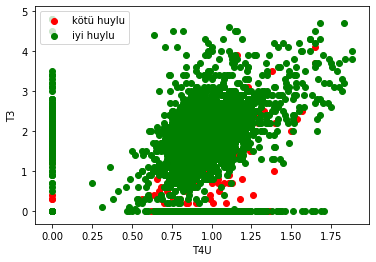

In [195]:
plt.scatter(p.T4U,p.T3,color="red",label="kötü huylu")
plt.scatter(n.T4U,n.T3,color="green",label="iyi huylu")
plt.xlabel("T4U")
plt.ylabel("T3")
plt.legend()
plt.show()

positive kategoride az veriler var

### Normalizasyon

In [197]:
y=df.Class.values
x_data=df.drop(["Class"],axis=1)
#x=x_data

In [148]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

## Eğitim/test bölünmesi (train/test split)

In [198]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)

## KNN

In [199]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
knn_score=knn.score(x_test,y_test)
print(knn_score)

0.9473684210526315


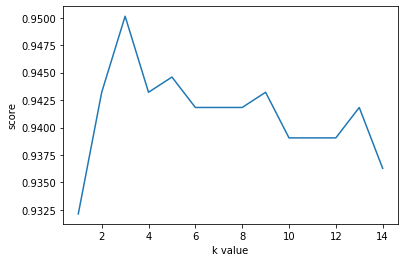

In [152]:
score_list=[]
for i in range(1,15):
    knn2=KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k value")
plt.ylabel("score")
plt.show()

## SVM

In [153]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)

print("svm score:",svm.score(x_test,y_test))

svm score: 0.9362880886426593


C:\Users\manae_000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=1)
dt.fit(x_train,y_train)

print("dt score:",dt.score(x_test,y_test))

## Random Forest

In [160]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200, random_state=1)
rf.fit(x_train,y_train)

print("rf score:",rf.score(x_test,y_test))

rf score: 1.0
